Notebook to implement spinning of icospheres




In [1]:
#ico class
import os
import numpy as np
import nibabel as nb
import copy
from scipy import sparse 
import meld_classifier.mesh_tools as mt
import torch
from math import pi 
import logging
from meld_graph.icospheres import IcoSpheres
import matplotlib_surface_plotting as msp
from scipy.stats import special_ortho_group
from scipy.spatial import cKDTree
# import logging
logging.basicConfig(level=logging.DEBUG)

Setting MELD_DATA_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting BASE_PATH to /rds/project/kw350/rds-kw350-meld/meld_data/Data
Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments/co-ripa1/
Setting FS_SUBJECTS_PATH to 


In [2]:
### test class augment
from meld_graph.augment import Augment
from meld_classifier.meld_cohort import MeldCohort, MeldSubject
from meld_graph.dataset import GraphDataset

icos=IcoSpheres(conv_type='SpiralConv')
ico_index=7
ico_ini = icos.icospheres[ico_index]

#test on subject
site_codes=['H4']
subjects = ['MELD_H4_3T_FCD_0011']
features=  [ 
    #  '.combat.on_lh.pial.K_filtered.sm20.mgh',
        '.combat.on_lh.thickness.sm10.mgh',
        '.combat.on_lh.w-g.pct.sm10.mgh',
        # '.combat.on_lh.sulc.sm5.mgh',
        # '.combat.on_lh.curv.sm5.mgh',
        # '.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
        # '.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
        # '.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
        # '.combat.on_lh.gm_FLAIR_0.sm10.mgh',
        # '.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
        # '.combat.on_lh.wm_FLAIR_1.sm10.mgh',
        # '.inter_z.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh',
        # '.inter_z.intra_z.combat.on_lh.thickness.sm10.mgh',
        # '.inter_z.intra_z.combat.on_lh.w-g.pct.sm10.mgh',
        # '.inter_z.intra_z.combat.on_lh.sulc.sm5.mgh',
        # '.inter_z.intra_z.combat.on_lh.curv.sm5.mgh',
        # '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
        # '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
        # '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
        # '.inter_z.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh',
        # '.inter_z.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
        # '.inter_z.intra_z.combat.on_lh.wm_FLAIR_1.sm10.mgh',
        # '.inter_z.asym.intra_z.combat.on_lh.pial.K_filtered.sm20.mgh',
        # '.inter_z.asym.intra_z.combat.on_lh.thickness.sm10.mgh',
        # '.inter_z.asym.intra_z.combat.on_lh.w-g.pct.sm10.mgh',
        # '.inter_z.asym.intra_z.combat.on_lh.sulc.sm5.mgh',
        # '.inter_z.asym.intra_z.combat.on_lh.curv.sm5.mgh',
        # '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.75.sm10.mgh',
        # '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.5.sm10.mgh',
        # '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.25.sm10.mgh',
        # '.inter_z.asym.intra_z.combat.on_lh.gm_FLAIR_0.sm10.mgh',
        # '.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_0.5.sm10.mgh',
        # '.inter_z.asym.intra_z.combat.on_lh.wm_FLAIR_1.sm10.mgh',
        ]
            
# initiate params
def load_config(config_file):
    """load config.py file and return config object"""
    import importlib.machinery, importlib.util

    loader = importlib.machinery.SourceFileLoader("config", config_file)
    spec = importlib.util.spec_from_loader(loader.name, loader)
    config = importlib.util.module_from_spec(spec)
    loader.exec_module(config)
    return config

config = load_config('../scripts/config_files/experiment_config_augment.py')
config.data_parameters['features']=features
cohort = MeldCohort(
            hdf5_file_root=config.data_parameters["hdf5_file_root"], dataset=config.data_parameters["dataset"]
        )
dataset = GraphDataset(subjects, cohort, config.data_parameters, mode='test' , distance_maps=True)


DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7
DEBUG:h5py._conv:Creating converter from 7 to 5
DEBUG:h5py._conv:Creating converter from 5 to 7


Setting EXPERIMENT_PATH to /rds/project/kw350/rds-kw350-meld/experiments_graph/co-ripa1


DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.
DEBUG:meld_graph.icospheres:Using coord type pseudo
DEBUG:meld_graph.icospheres:Using coord type pseudo
INFO:meld_graph.dataset:Loading and preprocessing test data
DEBUG:meld_graph.dataset:Combine hemis None


dataset using distance_maps


INFO:meld_graph.dataset:WARNING: Simulating 1 subjects using 1 controls
INFO:meld_graph.data_preprocessing:Z-scoring data for MELD_H4_3T_FCD_0011
DEBUG:meld_classifier.meld_cohort:missing feature: .on_lh.lesion.mgh set to zero


In [3]:
dataset.data_list[0]

{'features': array([[ 0.06625009, -0.66529375],
        [-0.47904807, -0.60324764],
        [-0.2688597 , -2.6655142 ],
        ...,
        [ 0.82639885, -0.4546607 ],
        [ 0.9332498 , -0.43645415],
        [ 1.0210999 , -0.4383021 ]], dtype=float32),
 'labels': array([0, 0, 0, ..., 0, 0, 0], dtype=int32),
 'distances': array([126.33265, 114.40214,  28.65407, ..., 155.62201, 156.45908,
        157.29617], dtype=float32)}

In [7]:
params = config.data_parameters
params['augment_data'] = {'spinning': {'p': 0.2, 'file': 'data/spinning/spinning_ico7_10.npy'},
#  'warping': {'p': 0.2, 'file': 'data/warping/warping_ico7_10.npy'},
#  'noise': {'p': 0.15},
#  'blur': {'p': 0.2},
#  'brightness': {'p': 0.15},
#  'contrast': {'p': 0.15},
#  'low_res': {'p': 0.25},
#  'gamma': {'p': 0.15},
#  'flipping': {'p': 0.5, 'file': 'data/flipping/flipping_ico7_3.npy'},
 'extend_lesion':{'p': 1}
}
# params['augment_data']

In [8]:
augment = Augment(params['augment_data'])

In [11]:
# features_subj, labels_subj = dataset.data_list[0]
# distance_subj = dataset.distance_map_list[0]
# import time
# t1=time.time()
# for k in np.arange(1000):
#     if k%100==0:
#         t2=time.time()
#         print(t2-t1)
#     augment_feature, augment_lesion, augment_distance = augment.apply(
#         features=features_subj,
#         lesions= labels_subj, 
#         distances= distance_subj, 
#         )
# print(t2-t1)

7.987022399902344e-05
1.0
9.0
20.0
2.0
12.0
1.0
13.0
9.0
14.0
9.0
20.0
2.0
12.0
10.0
11.0
11.0
18.0
4.0
4.0
12.0
7.0
6.0
9.0
5.0
1.0
7.0
15.0
9.0
1.0
9.0
3.0
15.0
15.0
16.0
5.0
16.0
1.0
4.0
7.0
8.0
13.0
13.0
2.0
13.0
1.0
7.0
17.0
9.0
4.0
14.0
20.0
19.0
3.0
17.0
11.0
9.0
1.0
14.0
11.0
14.0
3.0
9.0
1.0
3.0
20.0
12.0
9.0
17.0
16.0
18.0
3.0
6.0
15.0
10.0
14.0
3.0
12.0
17.0
14.0
1.0
20.0
12.0
5.0
13.0
2.0
3.0
19.0
16.0
20.0
20.0
18.0
17.0
17.0
5.0
11.0
11.0
19.0
1.0
4.0
19.0
0.16527485847473145
7.0
4.0
17.0
2.0
11.0
20.0
17.0
17.0
15.0
19.0
1.0
2.0
7.0
2.0
6.0
1.0
4.0
11.0
16.0
7.0
20.0
2.0
3.0
8.0
11.0
13.0
2.0
3.0
10.0
14.0
2.0
14.0
7.0
10.0
1.0
3.0
9.0
10.0
11.0
3.0
16.0
11.0
17.0
2.0
6.0
18.0
9.0
6.0
19.0
12.0
20.0
1.0
16.0
4.0
15.0
12.0
7.0
16.0
8.0
7.0
15.0
3.0
13.0
16.0
20.0
13.0
18.0
10.0
10.0
9.0
12.0
1.0
10.0
5.0
5.0
3.0
8.0
1.0
18.0
14.0
13.0
13.0
20.0
8.0
11.0
11.0
14.0
6.0
4.0
18.0
9.0
2.0
15.0
16.0
2.0
11.0
16.0
4.0
13.0
12.0
0.33749866485595703
15.0
8.0
11.0
13.0
12.0
19.0
3.

In [20]:
features_subj = dataset.data_list[0]['features'] 
labels_subj =  dataset.data_list[0]['labels'] 
distance_subj = dataset.data_list[0]['distances'] 

tdd = augment.apply(dataset.data_list[0])

augment_feature = tdd['features'] 
augment_label =  tdd['labels'] 
augment_distance = tdd['distances'] 



16.0


In [13]:
features_subj[:,0]

array([ 0.06625009, -0.47904807, -0.2688597 , ...,  0.82639885,
        0.9332498 ,  1.0210999 ], dtype=float32)

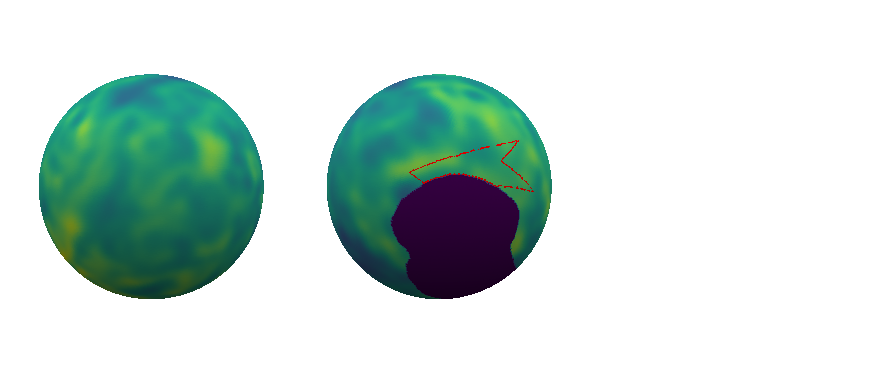

In [15]:
# plot feature and lesion before augmentation 
logging.basicConfig(level=None)
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              features_subj[:,0], parcel=labels_subj,
              filled_parcels=False,parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[90,270], 
                #   vmin=-5,vmax=5
                 );

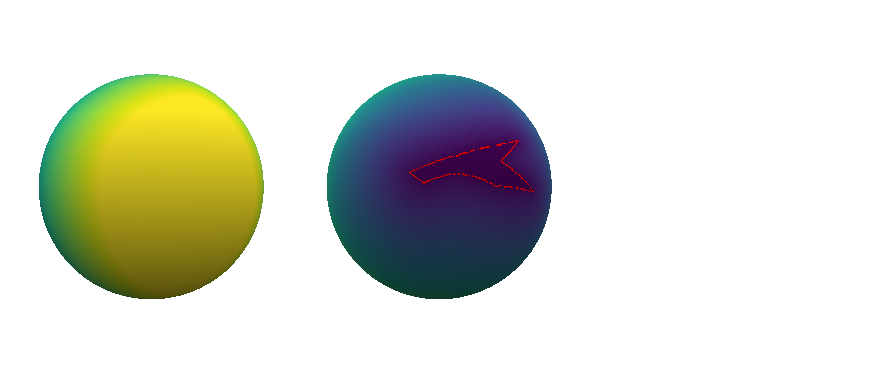

In [16]:
# plot distance map and lesion before augmentation 
logging.basicConfig(level=None)
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              distance_subj, parcel=labels_subj,
              filled_parcels=False,parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[90,270], 
                 );

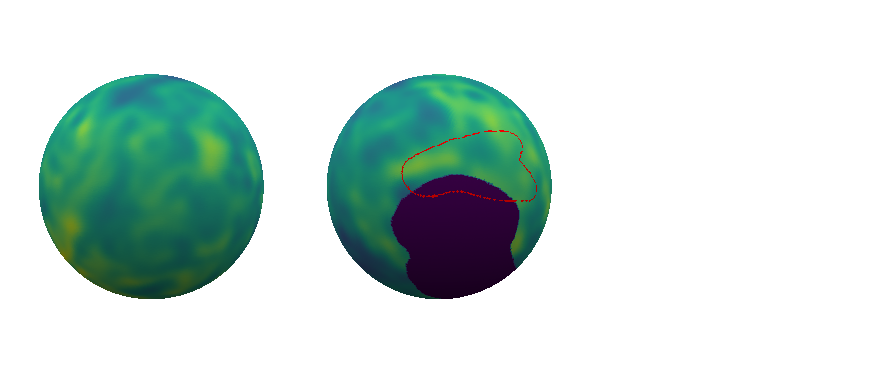

In [21]:
# plot feature and lesion after augmentation
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              augment_feature[:,0], parcel=augment_label,
              filled_parcels=False,parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[90,270], 
                #   vmin=-2,vmax=2
                 );

/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/matplotlib_surface_plotting/matplotlib_surface_plotting.py:318: RuntimeWarning: divide by zero encountered in true_divide
  colours = (colours - vmin)/(vmax-vmin)
/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/matplotlib_surface_plotting/matplotlib_surface_plotting.py:318: RuntimeWarning: invalid value encountered in true_divide
  colours = (colours - vmin)/(vmax-vmin)


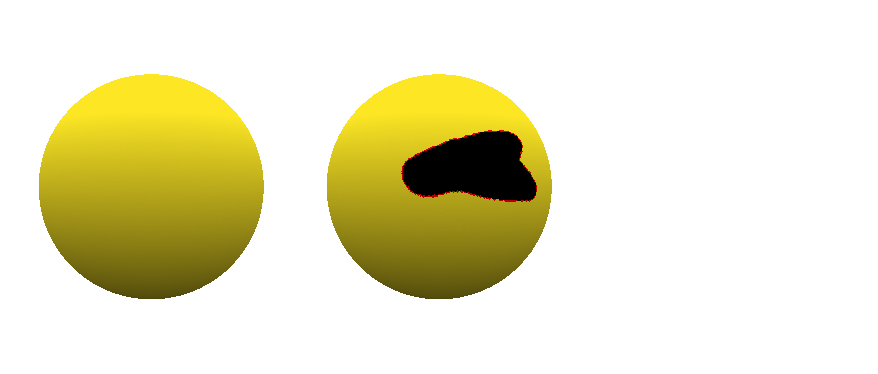

In [22]:
# plot feature and lesion after augmentation
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              augment_distance, parcel=augment_label,
              filled_parcels=False,parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[90,270], 
                  vmin=0, vmax=0
                 );

## Create lesion mask

In [81]:
def create_lesion_mask(self,radius,cartesian_coords,return_smoothed=True):
        """create irregular polygon lesion mask"""
        import matplotlib.path as mpltPath
        #from sklearn.metrics import pairwise_distances
        from scipy import interpolate,ndimage
        import copy
        from meld_graph.resampling_meshes import spinning_coords
        from meld_classifier import mesh_tools as mt
        spun_coords = spinning_coords(cartesian_coords)
        spherical_coords = mt.spherical_np(spun_coords)[:,1:]
        spherical_coords[:,0] = spherical_coords[:,0]-np.pi/2
        spherical_coords = self.clip_spherical_coords(spherical_coords)

        #select a radius
        f_radius = np.clip(np.random.normal(radius,radius/2),0.05,2)
        n_points = np.random.choice(6)+4
        subset = self.grid_coords[self.distances<f_radius]
        #establish mask and mask coordinates
        x_mask = np.logical_and(self.grid_coords_grid[0]>-f_radius,self.grid_coords_grid[0]<f_radius)
        y_mask = np.logical_and(self.grid_coords_grid[1]>-f_radius,self.grid_coords_grid[1]<f_radius)
        grid_mask = np.logical_and(x_mask
            ,y_mask
            )
        mask_shape=(x_mask.any(axis=1).sum(),y_mask.any(axis=0).sum())
        masked_grid_coords = np.vstack([self.grid_coords_grid[0][grid_mask],
                      self.grid_coords_grid[1][grid_mask]]).T
        
        poly_i = np.random.choice(len(subset),n_points)
        polygon = subset[poly_i]
        polygon = np.array(sorted(polygon, key=lambda point: self.clockwiseangle_and_distance(point,self.origin)))
        path = mpltPath.Path(polygon)
        lesion = path.contains_points(masked_grid_coords)
        #lesion = path.contains_points(self.grid_coords)
        arr_lesion = lesion.reshape(mask_shape).astype(float)
        #arr_lesion = lesion.reshape(self.gridshape,order='f').astype(float)
        #interpolate to coordinates
        
        full_lesion = np.zeros(self.gridshape,dtype=float)
        full_lesion[grid_mask.T] = arr_lesion.T.ravel()
        f_near=interpolate.RegularGridInterpolator((self.xnew,self.ynew),
                                                   full_lesion.T,
                                                  method='nearest')
        interpolated_lesion=f_near(spherical_coords)
        #smoothed mask
        if return_smoothed:
            smoothed = ndimage.gaussian_filter(arr_lesion,10)
            full_lesion[grid_mask.T] = smoothed.T.ravel()

            f_lin=interpolate.RegularGridInterpolator((self.xnew,self.ynew),
                                                   full_lesion.T,
                                                  method='linear')
            #return grid_coords,smoothed
            interpolated_smoothed = f_lin(spherical_coords)
            return interpolated_lesion, interpolated_smoothed 
        else:
            return interpolated_lesion

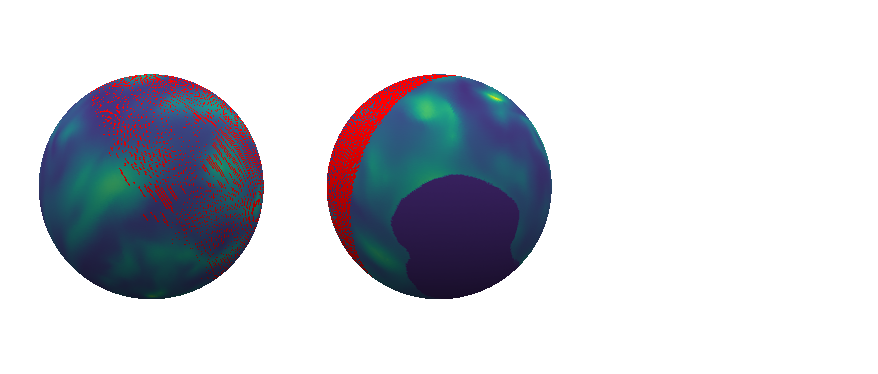

In [26]:
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              features_subj[:,0], parcel=labels_subj,
              filled_parcels=False,parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[90,270], 
                  vmin=-2.5,vmax=7
                 )

In [10]:
dataset_augment = dataset.get(0)

DEBUG:meld_graph.augment:apply Gaussian noise
DEBUG:meld_graph.augment:apply Brightness scaling


In [26]:
d = np.zeros((10,len(dataset_augment['x'][:,0].numpy())))
for k in np.arange(10):
    dataset_augment = dataset.get(0)
    d[k]=dataset_augment['x'][:,0].numpy()

DEBUG:meld_graph.augment:apply Gaussian noise
DEBUG:meld_graph.augment:apply low res
DEBUG:meld_graph.augment:apply Brightness scaling
DEBUG:meld_graph.augment:apply Gaussian blur
DEBUG:meld_graph.augment:apply Brightness scaling
DEBUG:meld_graph.augment:apply gamma
DEBUG:meld_graph.augment:apply gamma
DEBUG:meld_graph.augment:apply gamma
DEBUG:meld_graph.augment:apply Brightness scaling
DEBUG:meld_graph.augment:apply Brightness scaling
DEBUG:meld_graph.augment:apply gamma
DEBUG:meld_graph.augment:apply Gaussian blur
DEBUG:meld_graph.augment:apply Brightness scaling
DEBUG:meld_graph.augment:apply Brightness scaling
DEBUG:meld_graph.augment:apply low res
DEBUG:meld_graph.augment:apply gamma


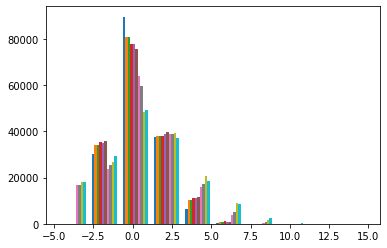

In [29]:
plt.hist(d.T);

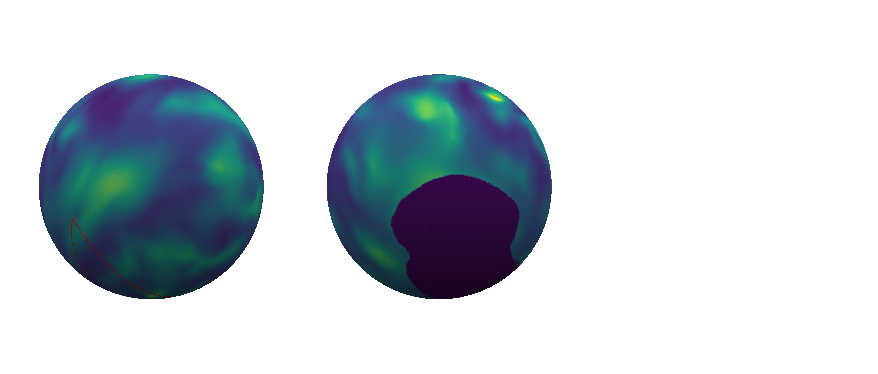

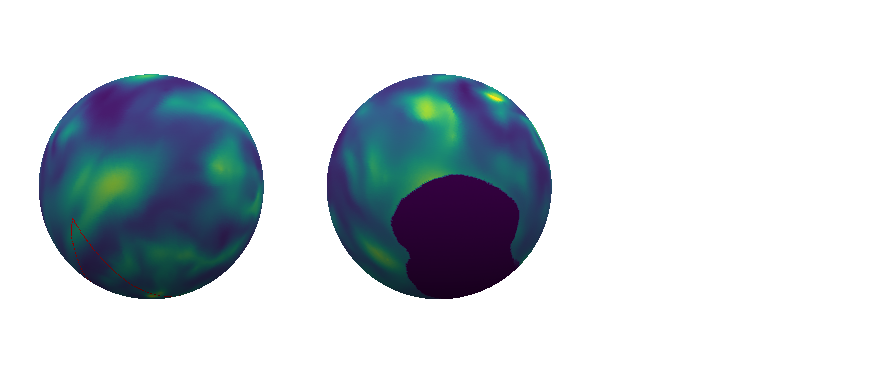

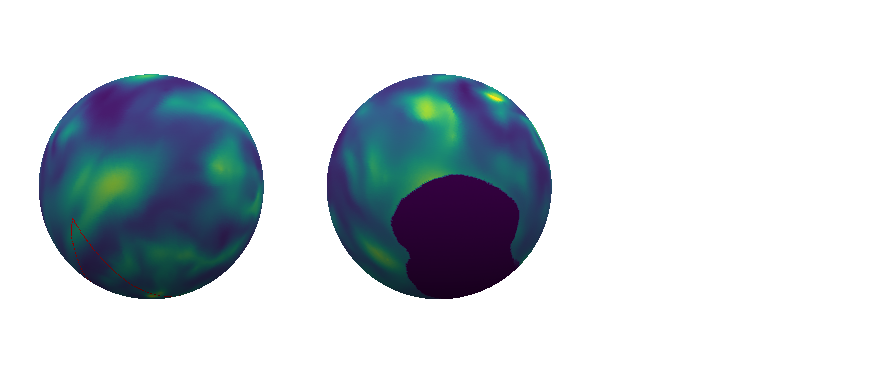

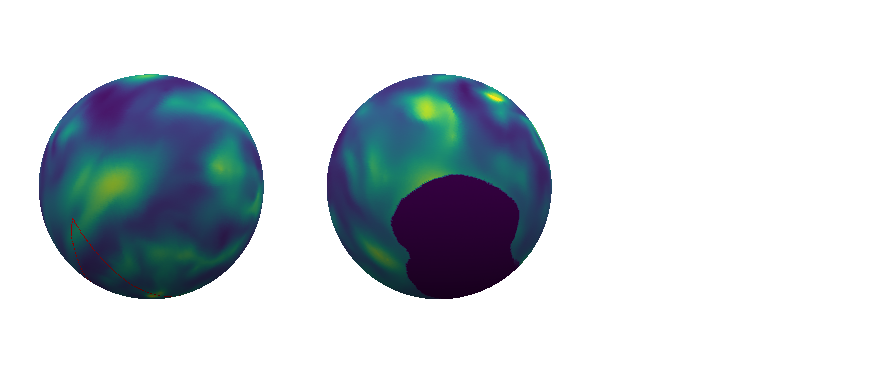

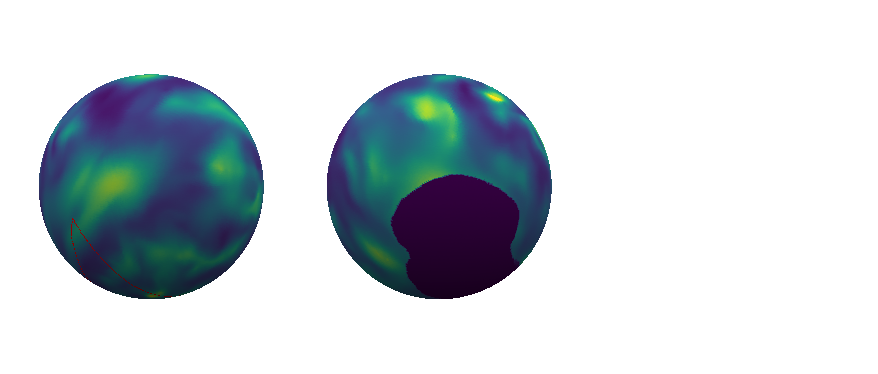

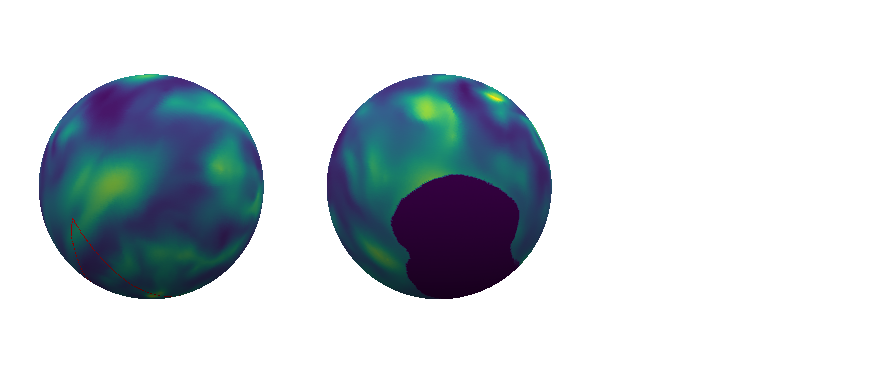

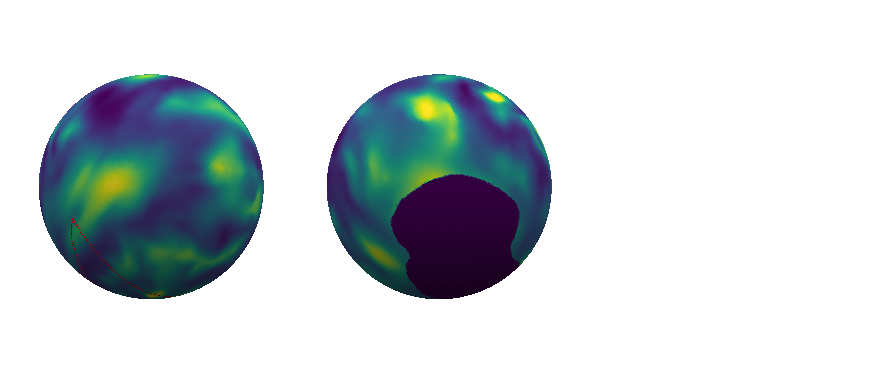

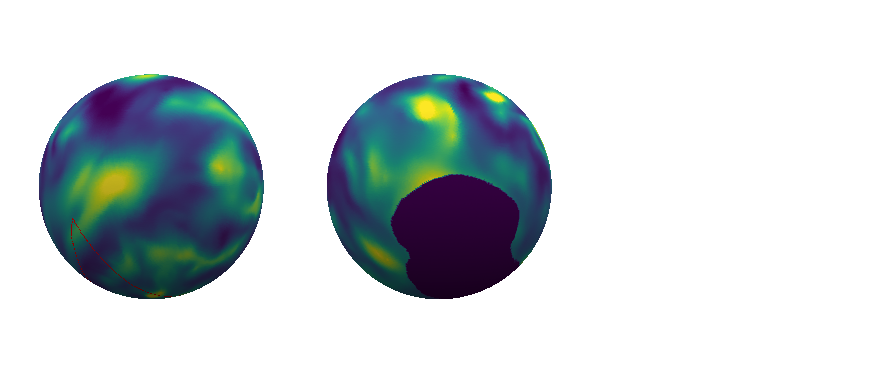

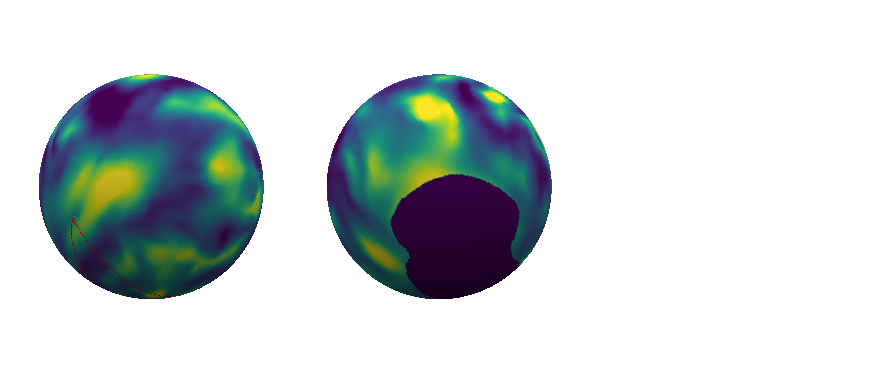

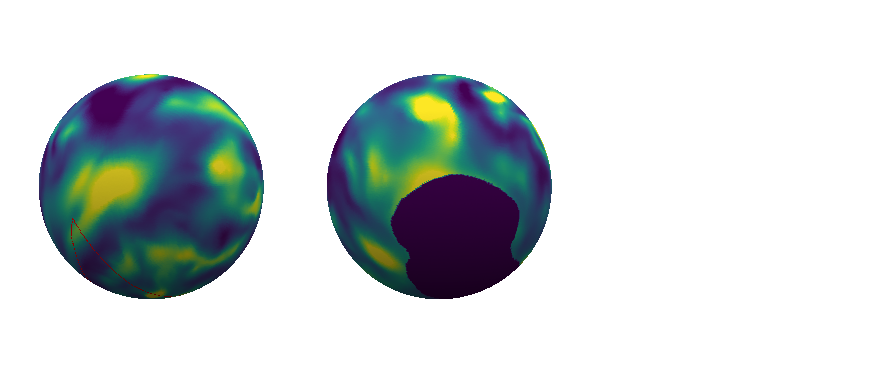

In [30]:
for k in np.arange(10):
    msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              d[k], parcel=dataset_augment['y'].numpy(),
              filled_parcels=False,parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[90,270], 
                  vmin=-2.5,vmax=7
                 )

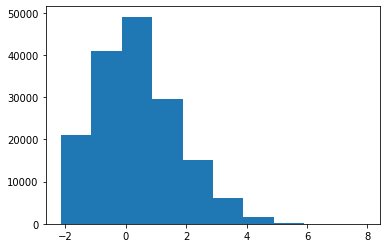

In [20]:
import matplotlib.pyplot as plt
plt.hist(dataset_augment['x'][:,0].numpy());

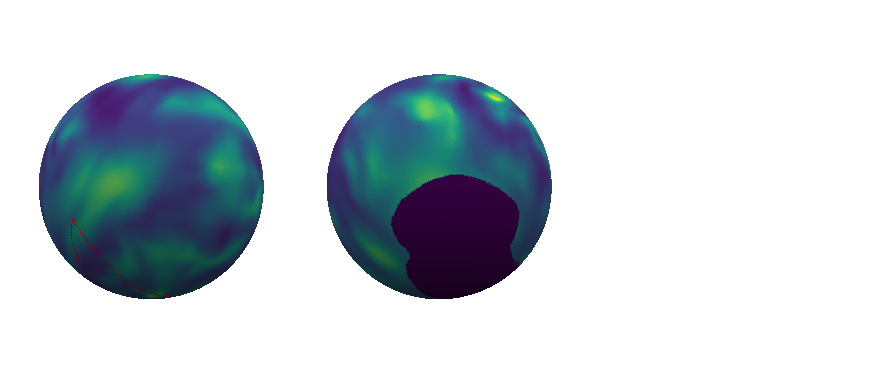

In [14]:
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              dataset_augment['x'][:,0].numpy(), parcel=dataset_augment['y'].numpy(),
              filled_parcels=False,parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[90,270], 
                 )


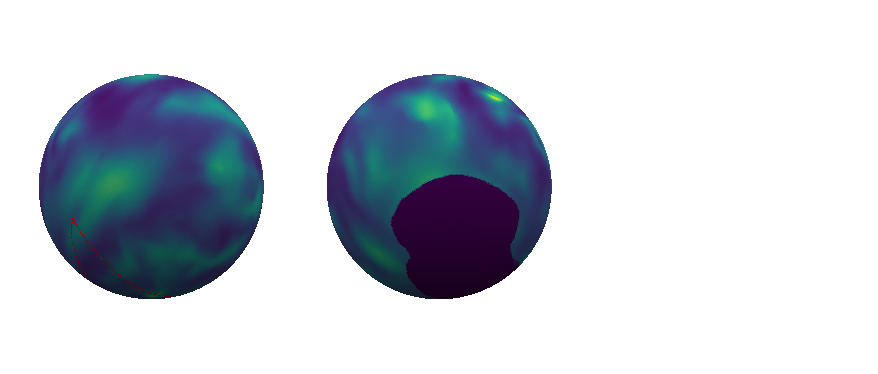

In [17]:
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              dataset_augment['x'][:,0].numpy(), parcel=dataset_augment['y'].numpy(),
              filled_parcels=False,parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[90,270], 
                 )


In [ ]:
import time

def fastind(a, rows, cols):
    return (a.ravel()[(cols + (rows * a.shape[1]).reshape((-1,1))).ravel()]).reshape(rows.size, cols.size)

a = np.random.randn(3218, 1415)
print(a.shape)
# rows = np.random.randint(a.shape[0], size=2000)
rows=np.arange(0, len(a))
print(rows)
# cols = np.array([1,3,4,5])
cols=np.array([5])
print(cols)

# start_time = time.process_time()
# result1 = a[rows][:, cols]
# end_time =time.process_time()
# print("execution time 1= " + str(end_time - start_time) + " seconds")


# start_time = time.process_time()
# b = fastind(a,rows, cols)
# end_time =time.process_time()
# print("execution time 2= " + str(end_time - start_time) + " seconds")

In [ ]:
timeit (a.ravel()[(cols + (rows * a.shape[1]).reshape((-1,1))).ravel()]).reshape(rows.size, cols.size)

In [ ]:
timeit fastind(a, rows,cols)

In [17]:
timeit fastind(a,rows, cols)

46 µs ± 232 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [3]:
set(augment.params)

{'augment_data',
 'combine_hemis',
 'features',
 'lobes',
 'preprocessing_parameters'}

In [5]:
import time
lambdas, indices = np.load(os.path.join('/rds/user/co-ripa1/hpc-work/scripts/meld_classifier_GDL/data/spinning/spinning_ico7_10.npy'))
indices = indices.astype('int') 

feats=np.zeros((len(ico_ini['coords']), 11))
lesions=np.zeros(len(ico_ini['coords']))

start_time = time.process_time()
# select random transformation parameter
transf = 0
# spin lesions if exist
if lesions.any()!= None:            
    lesions_transf = lambdas[transf,:,0]*lesions[indices[transf,:,0]] + lambdas[transf,:,1]*lesions[indices[transf,:,1]] + lambdas[transf,:,2]*lesions[indices[transf,:,2]]   
    lesions_transf = np.round(lesions_transf)
# spin features
n_feat = len(feats.T)
lambdas = np.tile(lambdas[:,:,:,np.newaxis], n_feat )
feats_transf = lambdas[transf,:,0]*feats[indices[transf,:,0]] + lambdas[transf,:,1]*feats[indices[transf,:,1]] + lambdas[transf,:,2]*feats[indices[transf,:,2]]        
feats_transf_clean=np.zeros(feats_transf.shape)
for i in range(0,n_feat):
    feats_transf_clean[:,i]=np.clip(feats_transf[:,i], np.percentile(feats_transf[:,i], 0.01),np.percentile(feats_transf[:,i], 99.9))  
end_time =time.process_time()
print("execution time 1= " + str(end_time - start_time) + " seconds")

execution time 1= 0.5318231220000005 seconds


In [102]:
def fastind(a, rows, cols):
    return (a.ravel()[(cols + (rows * a.shape[1]).reshape((-1,1))).ravel()]).reshape(rows.size, cols.size)
lambdas, indices = np.load(os.path.join('/rds/user/co-ripa1/hpc-work/scripts/meld_classifier_GDL/data/spinning/spinning_ico7_10.npy'))
indices = indices.astype('int') 

feats=np.zeros((len(ico_ini['coords']), 11))
lesions=np.zeros(len(ico_ini['coords']))

start_time = time.process_time()
# select random transformation parameter
transf = 0
indices=copy.deepcopy(indices[transf])
i0=indices[:,0]
i1=indices[:,1]
i2=indices[:,2]
lambdas=copy.deepcopy(lambdas[transf])
l0=lambdas[:,0]
l1=lambdas[:,1]
l2=lambdas[:,2]
#spin lesions if exist
if lesions.any()!= None:            
    lesions_transf = l0*lesions[i0] + l1*lesions[i1] + l2*lesions[i2]   
    lesions_transf = np.round(lesions_transf)
# spin features
n_feat = len(feats.T)
# l0 = np.tile(l0[:,np.newaxis], n_feat)
# l1 = np.tile(l1[:,np.newaxis], n_feat)
# l2 = np.tile(l2[:,np.newaxis], n_feat)
# feats_transf = l0*feats[i0] + l1*feats[i1] + l2*feats[i2]        
# feats_transf_clean=np.zeros(feats_transf.shape)
# feats_transf_clean=np.clip(feats_transf, np.percentile(feats_transf, 0.01),np.percentile(feats_transf, 99.9))  
end_time =time.process_time()
print("execution time 2= " + str(end_time - start_time) + " seconds")

execution time 2= 0.019229922999997484 seconds


In [101]:
start_time = time.process_time()
feats_transf_clean=np.zeros(feats_transf.shape)
for i in range(0,n_feat):
    feat_temp=feats_transf[:,i]
    feat_temp = l0*feat_temp[i0] + l1*feat_temp[i1] + l2*feat_temp[i2]        
    feats_transf_clean[:,i]=np.clip(feat_temp, np.percentile(feat_temp, 0.01),np.percentile(feat_temp, 99.9))  
end_time =time.process_time()
print("execution time 2= " + str(end_time - start_time) + " seconds")

execution time 2= 0.14500021799999274 seconds


In [103]:
start_time = time.process_time()
l0 = np.tile(l0[:,np.newaxis], n_feat)
l1 = np.tile(l1[:,np.newaxis], n_feat)
l2 = np.tile(l2[:,np.newaxis], n_feat)
feats_transf = l0*feats[i0] + l1*feats[i1] + l2*feats[i2]        
feats_transf_clean=np.clip(feats_transf, np.percentile(feats_transf, 0.01),np.percentile(feats_transf, 99.9))  
end_time =time.process_time()
print("execution time 2= " + str(end_time - start_time) + " seconds")

execution time 2= 0.16088121900000374 seconds


In [94]:
l0.shape

(163842, 1, 1, 1331)

In [68]:
start_time = time.process_time()
feats_transf_clean2=np.zeros(feats_transf.shape)   
feats_transf_clean2=np.clip(feats_transf, np.percentile(feats_transf, 0.01),np.percentile(feats_transf, 99.9))
end_time =time.process_time()
print("execution time 2= " + str(end_time - start_time) + " seconds")

execution time 2= 0.04449404600000406 seconds


In [71]:
(feats_transf_clean2==feats_transf_clean).any()

True

In [62]:
feat_temp=feats_transf[:,i]

In [63]:

timeit np.clip(feat_temp, np.percentile(feat_temp, 0.01),np.percentile(feat_temp, 99.9)) 

2.37 ms ± 35.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [58]:
timeit np.clip(feats_transf[:,i], np.percentile(feats_transf[:,i], 0.01),np.percentile(feats_transf[:,i], 99.9))  

2.36 ms ± 22.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [54]:
def fastind(a, rows, cols):
    return (a.ravel()[(cols + (rows * a.shape[1]).reshape((-1,1))).ravel()]).reshape(rows.size, cols.size)
lambdas, indices = np.load(os.path.join('/rds/user/co-ripa1/hpc-work/scripts/meld_classifier_GDL/data/spinning/spinning_ico7_10.npy'))
indices = indices.astype('int') 

feats=np.zeros((len(ico_ini['coords']), 11))
lesions=np.zeros(len(ico_ini['coords']))

start_time = time.process_time()
# select random transformation parameter
transf = 0
indices=copy.deepcopy(indices[transf])
index_all=np.arange(0,len(indices))
i0=fastind(indices, index_all, np.array([0]))
i1=fastind(indices, index_all, np.array([1]))
i2=fastind(indices, index_all, np.array([2]))
lambdas=copy.deepcopy(lambdas[transf])
l0=fastind(lambdas, index_all, np.array([0]))
l1=fastind(lambdas, index_all, np.array([1]))
l2=fastind(lambdas, index_all, np.array([2]))
# spin lesions if exist
if lesions.any()!= None:            
    lesions_transf = l0*lesions[i0] + l1*lesions[i1] + l2*lesions[i2]   
    lesions_transf = np.round(lesions_transf)
# spin features
n_feat = len(feats.T)
l0 = np.tile(l0[:,np.newaxis], n_feat)
l1 = np.tile(l1[:,np.newaxis], n_feat)
l2 = np.tile(l2[:,np.newaxis], n_feat)
feats_transf = l0*feats[i0] + l1*feats[i1] + l2*feats[i2]        
feats_transf_clean=np.zeros(feats_transf.shape)
for i in range(0,n_feat):
    feat_tmp = fastind(feats_transf, index_all, np.array([i]))[:,0]
    feats_transf_clean[:,i]=np.clip(feat_tmp, np.percentile(feat_tmp, 0.01),np.percentile(feat_tmp, 99.9))  
end_time =time.process_time()
print("execution time 2= " + str(end_time - start_time) + " seconds")

ValueError: could not broadcast input array from shape (163842,) into shape (163842,11)

In [56]:
timeit indices[:,0]

151 ns ± 2.93 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [53]:
i012.shape

(163842, 3)

In [42]:
i0.shape

(163842, 1)

In [41]:
feats_transf_clean.shape

(163842, 1, 11)

In [22]:
lambdas[:,0]*feats[indices[:,0]]

ValueError: operands could not be broadcast together with shapes (163842,) (163842,11) 

In [53]:
lambdas[:,0].shape

(163842, 11)

In [18]:
index = 0
features_subj, labels_subj = dataset.data_list[index]
# spinned_feature, spinned_lesion = dataset.get(index)
torch_object= dataset.get(index)
spinned_feature = np.array(torch_object.x)
spinned_lesion = np.array(torch_object.y)

DEBUG:meld_graph.augment:random probability for spinning : 0.5302398027781884
DEBUG:meld_graph.augment:random probability for flipping : 0.5015224849128914
DEBUG:meld_graph.augment:random probability for warping : 0.6192659463116001
DEBUG:meld_graph.augment:apply warping


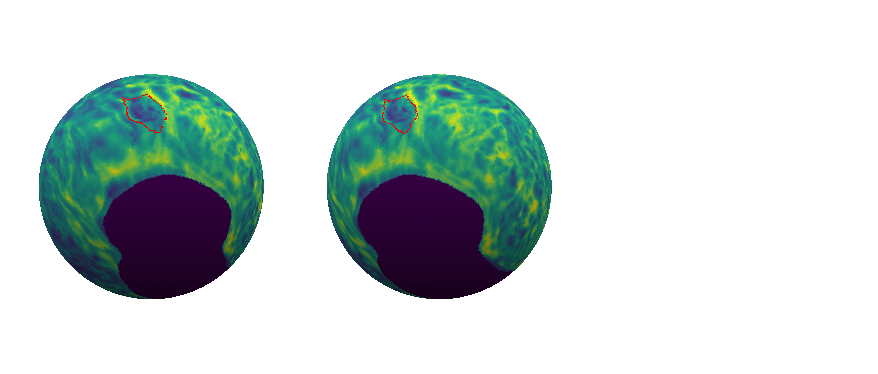

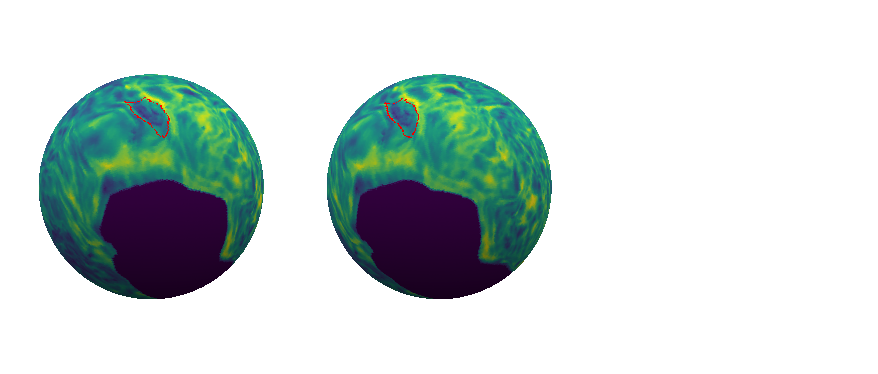

In [21]:
#plot feature on icosphere
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              features_subj[:,3], parcel=labels_subj, parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[270,250], 
                 )



# Plot spinned feature on icosphere
msp.plot_surf(ico_ini['coords'],
              ico_ini['faces'],
              spinned_feature[:,3], parcel=spinned_lesion,parcel_cmap={1:[1,0,0,0]},
              colorbar=False, rotate=[270,250],
                 )


In [7]:
from scipy.stats import ttest_ind
print(features_subj[:,0][labels_subj>0].mean())
print(spinned_feature[:,0][spinned_lesion>0].mean())
ttest_ind( features_subj[:,0][labels_subj>0], spinned_feature[:,0][spinned_lesion>0])

102.77413
103.672554


Ttest_indResult(statistic=-0.9749537019561735, pvalue=0.3296213180374049)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Bold.ttf', name='DejaVu Sans', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='s

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUniBolIta.ttf', name='STIXNonUnicode', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/co-ripa1/.conda/envs/meld_graph/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSansMono-Oblique.ttf', name='DejaVu Sans Mono', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/home/co-ripa1/.conda/envs/meld_graph

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/thai-scalable/Waree-Oblique.ttf', name='Waree', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/vlgothic/VL-PGothic-Regular.ttf', name='VL PGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/sil-nuosu/NuosuSIL.ttf', name='Nuosu SIL', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/liberation/LiberationMono-Regular.ttf', name='Liberation Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/lohit-tamil/Lohit-Tamil.ttf', n

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/urw-base35/Z003-MediumItalic.otf', name='Z003', style='italic', variant='normal', weight=500, stretch='normal', size='scalable')) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/tibetan-machine-uni/TibMachUni-1.901b.ttf', name='Tibetan Machine Uni', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/urw-base35/NimbusRoman-BoldItalic.otf', name='Nimbus Roman', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/ipa-pgothic/ipagp.ttf', name='IPAPGothic', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/dejavu/DejaVuS

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/google-crosextra-caladea/Caladea-Italic.ttf', name='Caladea', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/overpass/Overpass-Light-Italic.ttf', name='Overpass', style='italic', variant='normal', weight=300, stretch='normal', size='scalable')) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/urw-base35/C059-Roman.otf', name='C059', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/lohit-nepali/Lohit-Nepali.ttf', name='Lohit Nepali', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/open-sans/OpenSans-Regular.tt

DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/overpass/Overpass-ExtraLight Italic.ttf', name='Overpass', style='italic', variant='normal', weight=200, stretch='normal', size='scalable')) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/abattis-cantarell/Cantarell-Bold.otf', name='Cantarell', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/google-crosextra-caladea/Caladea-Bold.ttf', name='Caladea', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/stix/STIX-BoldItalic.otf', name='STIX', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(FontEntry(fname='/usr/share/fonts/dejavu/DejaVuSerif.tt

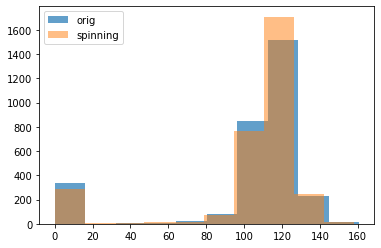

In [8]:
import matplotlib.pyplot as plt
plt.hist(features_subj[:,0][labels_subj>0], alpha=0.7, label='orig')
plt.hist(spinned_feature[:,0][spinned_lesion>0], alpha=0.5, label='spinning')
plt.legend()